In [3]:
from IPython.display import HTML

# Create file of running scripts

In [6]:
import numpy as np
import os
from itertools import product

import shutil

list_seeds = np.random.randint(low=0, high=99999, size=10)
list_lrs = 10**np.random.uniform(low=-6, high=1, size=10)  # numerical stability, see http://cs231n.github.io/neural-networks-3/#hyper

# Clean up the old log directory if existed
log_path = 'logs/'
if os.path.exists(log_path):
    shutil.rmtree(log_path)
os.makedirs(log_path)

# Clean up the old script.txt file if existed
script_path = os.path.join(log_path, 'script.txt')
if os.path.exists(script_path):
    os.remove(script_path)

for seed, lr in product(list_seeds, list_lrs):
    script_str = '\'python run_emptymaze.py --seed {:d} --lr {:f}\''
    
    script_str = script_str.format(seed, lr)
    
    with open(script_path, 'a') as f:
        f.write(script_str)
        f.write('\n\n')
    
#cat logs/script.txt | xargs -n 1 -P 4 bash -c

In [1]:
!python run_emptymaze.py --seed 25003 --lr 0.002413

[Episode #  1]: 
 		Total loss: 0.688279		Batch episodic rewards: -14.160000
[Episode #100]: 
 		Total loss: -2.326074		Batch episodic rewards: 0.870000
[Episode #200]: 
 		Total loss: -0.219603		Batch episodic rewards: -0.090000
[Episode #300]: 
 		Total loss: -0.646123		Batch episodic rewards: 0.910000
[Episode #400]: 
 		Total loss: -1.131788		Batch episodic rewards: 0.910000
[Episode #500]: 
 		Total loss: -1.373990		Batch episodic rewards: 0.910000
[Episode #600]: 
 		Total loss: -1.524857		Batch episodic rewards: -0.090000
[Episode #700]: 
 		Total loss: -0.619134		Batch episodic rewards: 0.910000
[Episode #800]: 
 		Total loss: -1.363873		Batch episodic rewards: 0.910000
[Episode #900]: 
 		Total loss: -1.952197		Batch episodic rewards: 0.910000
[Episode #1000]: 
 		Total loss: -1.764840		Batch episodic rewards: 0.910000


# Visualization of learning dynamics
### Average over different random seeds

/home/zuo/anaconda3/envs/RL/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


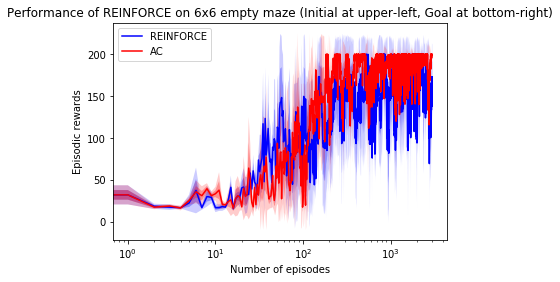

In [102]:
import numpy as np
from plotter import Plotter

from glob import glob  # matching pathnames with patterns

plotter = Plotter()

scales = [0.5, 1.0]
alphas = [0.3, 0.2]

data = []
for filepath in glob('logs/REINFORCE/*.npy'):
    data.append(np.load(filepath))
plotter.add_curve(data, 
                  color='blue', 
                  label='REINFORCE', 
                  uncertainty=True, 
                  scales=scales, 
                  alphas=alphas)

data = []
for filepath in glob('logs/ActorCritic/*.npy'):
    data.append(np.load(filepath))
plotter.add_curve(data, 
                  color='red', 
                  label='AC', 
                  uncertainty=True, 
                  scales=scales, 
                  alphas=alphas)

title = 'Performance of REINFORCE on 6x6 empty maze (Initial at upper-left, Goal at bottom-right)'
xlabel = 'Number of episodes'
ylabel = 'Episodic rewards'
fig = plotter.plot(title, xlabel, ylabel, log_x=True)
fig.show()

fig.savefig('logs/tmp.png')